In [18]:
import matplotlib.pyplot as plt
import spacy
import re
import pandas as pd
import json
from datasets import load_dataset
nlp = spacy.load("fr_core_news_md")

In [21]:
'''
Ce bloc transforme notre fichier json en dataframe 
en comptant le nombre de mot pour chaque title et content"
'''
with open('scraped_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

def word_count(text):
    words = text.split()
    return len(words)

for item in data:
    item['title_word_count'] = word_count(item['title'])
    item['content_word_count'] = word_count(item['content'])


df = pd.DataFrame(data)

df

,title,content,title_word_count,content_word_count
0,Manifestation propalestinienne à Sciences Po P...,"Le premier ministre, Gabriel Attal, a affirmé ...",20,462
1,"Au Royaume-Uni, un député conservateur passe d...","Le député conservateur Dan Poulter, ancien min...",16,230
2,"En Irak, une nouvelle loi anti-LGBTQ+ prévoit ...","Le Parlement irakien a adopté, samedi 27 avril...",12,468
3,"Ligue 1 : le PSG, accroché par Le Havre, doit ...",Douche froide sur le Parc des Princes. Sous un...,16,579
4,Trois nouveaux conseillers de Prisca Thevenot ...,L’hémorragie continue : après les premiers dép...,14,312
5,La justice annule les sanctions prises contre ...,Le tribunal administratif de Paris a annulé mi...,18,332
6,Les changements de nom de famille ont fortemen...,"La possibilité de changer de nom de famille,fa...",14,448
7,Le gouvernement va porter plainte contre Jean-...,"La ministre de l’enseignement supérieur, Sylvi...",23,431
8,Le Burkina Faso suspend l’accès à plusieurs si...,"L’accès à sept sites d’information en ligne, d...",20,523
9,JO 2024 : Valérie Pécresse assure que le prolo...,Valérie Pécresse affirme que la promesse sera ...,19,414


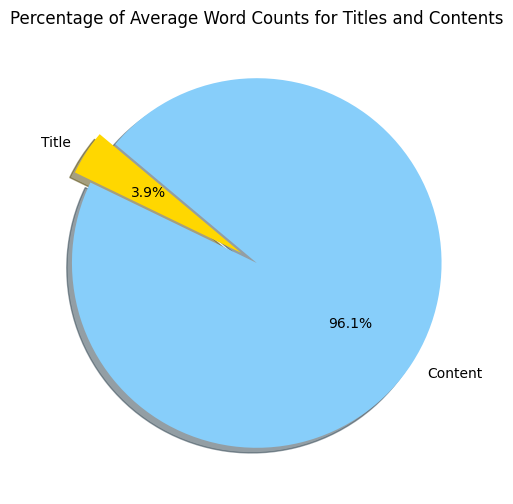

In [26]:
# counting average words of title and content
average_title_word_count = df['title_word_count'].mean()
average_content_word_count = df['content_word_count'].mean()

# Calculate total average words to get proportions for the pie chart
total_average_words = average_title_word_count + average_content_word_count
title_proportion = (average_title_word_count / total_average_words) * 100
content_proportion = (average_content_word_count / total_average_words) * 100

labels = 'Title', 'Content'
sizes = [title_proportion, content_proportion]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice


plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Average Word Counts for Titles and Contents')
plt.show()